In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data", # 데이터 저장 경로 -> 경로 폴더 없는 경우 만들어줌
    train=True, # 학습용이면 True, 테스트용이면 False
    download=True, # root 경로에 데이터가 없는 경우 인터넷에서 다운로드
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw




Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



/Users/paek-injin/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [2]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

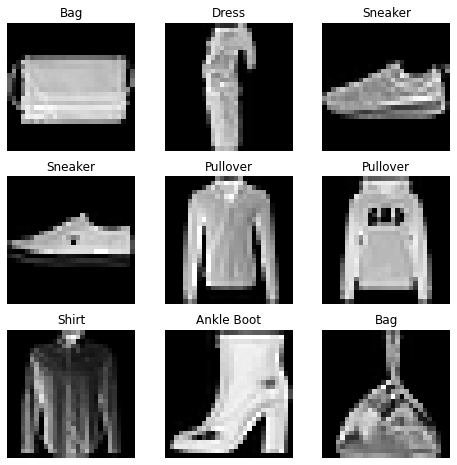

In [3]:
# Dataset에 리스트처럼 접근 가능 (인덱싱 가능)

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # 랜덤으로 샘플 인덱스 생성
    img, label = training_data[sample_idx] # 샘플 인덱스에 해당하는 training_data 인덱싱
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [4]:
# 사용자 정의 데이터셋
# __init__, __len__, __getitem__ 함수 반드시 구현해야 함
# 아래의 구현은 이미지를 img_dir에 저장되고 정답은 annotations_file csv파일에 별도로 저장됨

import os
import pandas as pd
from torchvision.io import read_image

class CusotomImageDataset(Dataset):
    
    def __init__(self, annotations_file, img_dir, transform = None, target_transform = None): # 객체 생성시 한번 실행됨 -> 이미지, 주석 디렉토리, transform 초기화
        self.img_labels = pd.read_csv(annotations_file, names = ['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self): # 데이터셋의 샘플 개수 반환
        return len(self.img_labels)
    
    def __getitem__(self, idx): # 주어진 인덱스 idx에 해당하는 샘플을 데이터셋에서 불러와 반환
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path) # 이미지를 텐서로 변환
        label = self.img_labels.iloc[idx, 1] # 이미지 레이블 가져옴
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {'image' : image, 'label' : label} # 텐서 이미지와 라벨을 dict로 반환
        return sample

In [6]:
# DataLoader로 학습용 데이터 준비하기
# 샘플들에 대해 미니배치로 전달하고, 매 에폭마다 데이터를 다시 섞어서 과적합을 막고, multiprocessing을 사용하여 데이터의 검색 속도 향상 가능
# iterator로 반환

from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

Feature batch shape : torch.Size([64, 1, 28, 28])
Labels batch shape : torch.Size([64])


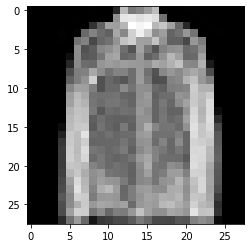

Label : Coat


In [10]:
# DataLoader를 통해 데이터 순회하기
# 아래의 순회는 batch_size = 64에 해당하는 train_features, train_labels의 묶음(batch)을 반환함

train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape : {train_features.size()}')
print(f'Labels batch shape : {train_labels.size()}')

img = train_features[0].squeeze() # 크기가 1인 차원을 제거하여 한 줄로 핌
label = train_labels[0]

plt.imshow(img, cmap = 'gray')
plt.show()

print(f'Label : {labels_map[label.item()]}')
